##Q-1. What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.
- Anomaly detection (outlier detection) is the task of identifying observations that deviate significantly from the expected pattern in data. These unusual points can indicate errors, fraud, faults, rare events, or novel phenomena.

  Types

- Point anomaly (global): a single data point is anomalous compared to the rest.

  Example: a single temperature reading of 200°C in a sensor that normally reads 20–30°C.

- Contextual (conditional) anomaly: a data point is anomalous in a particular context (context = time, location, etc.). The same value may be normal in another context.

  Example: 30°C is normal in summer but anomalous in winter for a given city. In time series, a high usage at 03:00 might be anomalous but the same value at 19:00 is normal.

- Collective anomaly: a group of related points is anomalous even though individual points might look normal.

  Example: a sequence of slightly elevated network latency values over several minutes that together indicate an outage beginning.

##Q-2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.
- 1. Isolation Forest (IF):

   - Works by randomly splitting data with decision trees.

   - Anomalies are isolated faster (fewer splits).

   - Scales well to large, high-dimensional datasets.

   - No need for distance measures → good for high dimensions.

   - Weakness: struggles when anomalies are very close to normal cluster boundaries.

  2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

   - Groups points in dense regions → sparse points are treated as outliers.

   - Can detect clusters of arbitrary shapes.

   - No need to specify number of clusters beforehand.

   - Weakness: very sensitive to parameters (eps, minPts).

   - Performs poorly in high-dimensional spaces.

  3. Local Outlier Factor (LOF):

   - Compares density of a point with that of its neighbors.

   - Flags points with significantly lower local density as outliers.

   - Detects local anomalies missed by global methods.

   - Weakness: computationally expensive for large datasets.

   - Needs careful tuning of neighborhood size.

## Q-3. What are the key components of a Time Series? Explain each with one example
- Key components of a Time Series are :
1. Trend — long-term increase or decrease.

   Example: Monthly electricity consumption slowly rising year-over-year.

2. Seasonality — repeating pattern at fixed frequency (daily, weekly, yearly).

   Example: Retail sales peak every December (yearly seasonality).

3. Cyclic component — longer, non-fixed cycles (business cycles) not strictly periodic.

   Example: Multi-year economic cycles in industrial production.

4. Irregular / Residual / Noise — random fluctuations not explained by other components.

   Example: One-off outage causing unusual drop in consumption.

##Q- 4. Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?
- Stationary time series: its statistical properties (mean, variance, autocorrelation) do not change over time. Stationarity is important for many classical forecasting models (ARMA/ARIMA).

- Tests for stationarity

  - Augmented Dickey–Fuller (ADF) test — null hypothesis: unit root present (non-stationary). p-value < α → reject non-stationary.

  - KPSS test — null hypothesis: series is stationary. p-value < α → reject stationarity.
   (Use both for robust decision.)

- Transformations to make series stationary

  - Differencing: y[t] - y[t-1] (first difference) — removes linear trend. Seasonal differencing: y[t] - y[t-s] for season s.

  - Log / Box–Cox transform: stabilizes variance.

  - Detrending: subtract a fitted trend (linear or polynomial).

  - Combination: log → seasonal differencing → (non-seasonal) differencing.

  - After transformation, re-run ADF/KPSS to confirm stationarity.

## Q- 5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.
- AR(p) — Autoregressive model

  - Structure: y[t] = c + φ1 y[t-1] + ... + φp y[t-p] + ε[t].

  - Uses past values as predictors.

  - Use when series shows autocorrelation explainable by past values.

- MA(q) — Moving Average model

  - Structure: y[t] = μ + ε[t] + θ1 ε[t-1] + ... + θq ε[t-q].

  - Uses past forecast errors (residuals).

  - Use when error terms are correlated.

- ARIMA(p,d,q)

  - Combines AR and MA on differenced data: difference order d makes series stationary.

  - Good for non-seasonal series with trend (d>0).

  - Typical process: difference to stationary → fit ARMA on differenced series.

- SARIMA (Seasonal ARIMA) — ARIMA with seasonal terms

  - Notation: SARIMA(p,d,q)(P,D,Q,s) — seasonal AR (P), seasonal differencing D, seasonal MA (Q) with seasonality s.

  - Use when series has seasonality (e.g., monthly with yearly seasonality s=12).

- SARIMAX

  - SARIMA + eXogenous regressors (X) — lets you include external predictors (weather, holidays).

  - Use when exogenous variables influence the series (e.g., temperature affecting energy demand).

/tmp/ipython-input-102113161.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1949-01-01', periods=len(ts), freq='M')


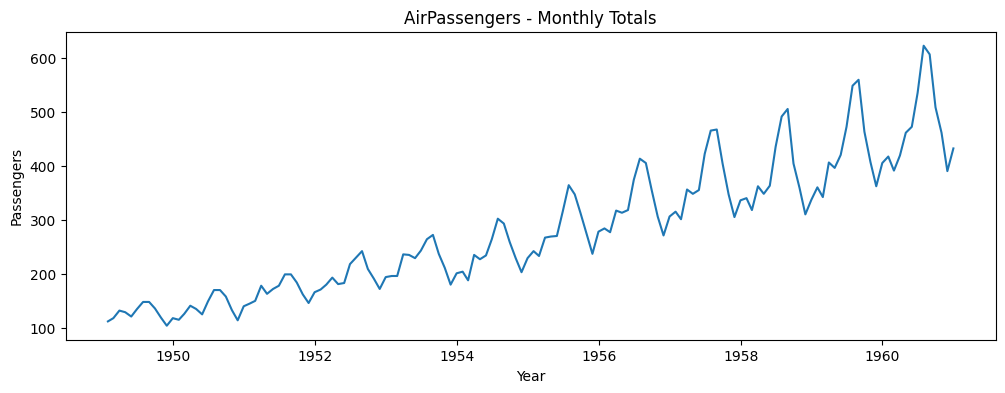

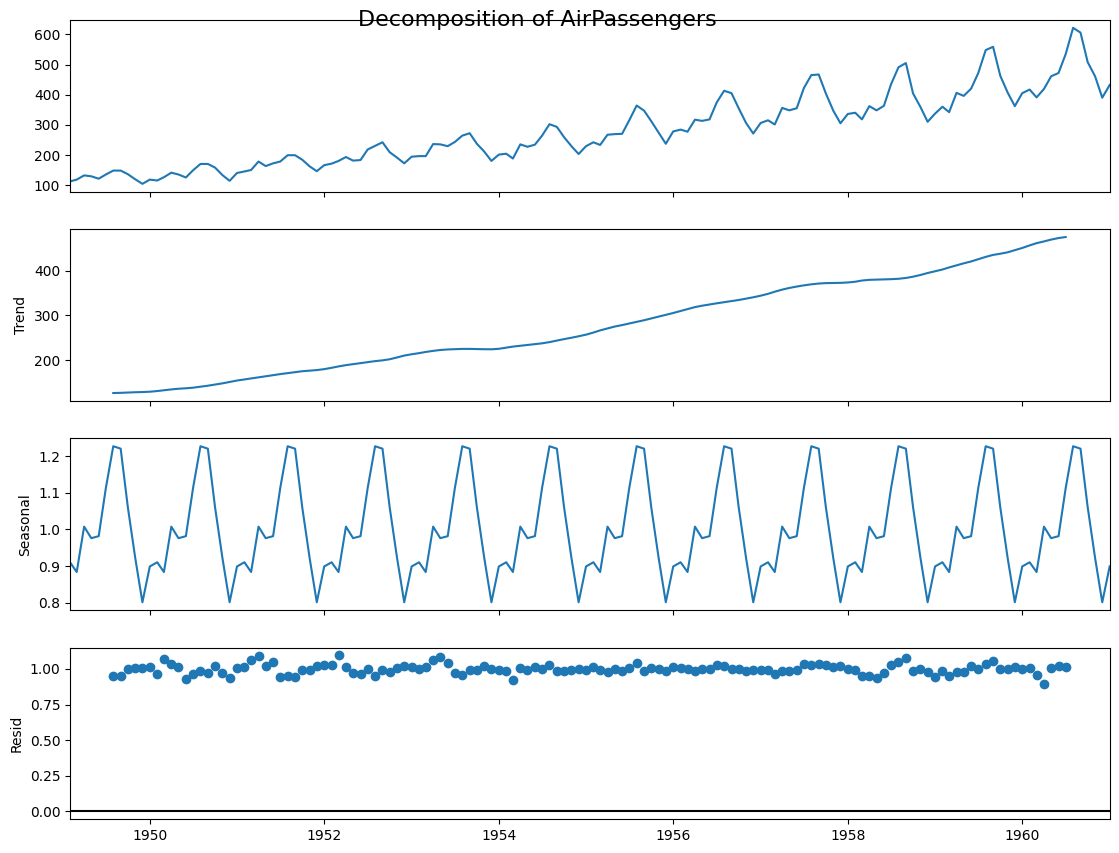

In [5]:
#6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

# Load AirPassengers dataset
rdata = get_rdataset('AirPassengers')
ts = rdata.data['value']
dates = pd.date_range(start='1949-01-01', periods=len(ts), freq='M')
series = pd.Series(ts.values, index=dates)
series.index.name = 'Month'

# Plot original
plt.figure(figsize=(12,4))
plt.plot(series)
plt.title('AirPassengers - Monthly Totals')
plt.ylabel('Passengers')
plt.xlabel('Year')
plt.show()

# Decompose (multiplicative)
decomp = seasonal_decompose(series, model='multiplicative', period=12)
fig = decomp.plot()
fig.set_size_inches(12,9)
plt.suptitle('Decomposition of AirPassengers', fontsize=16)
plt.show()


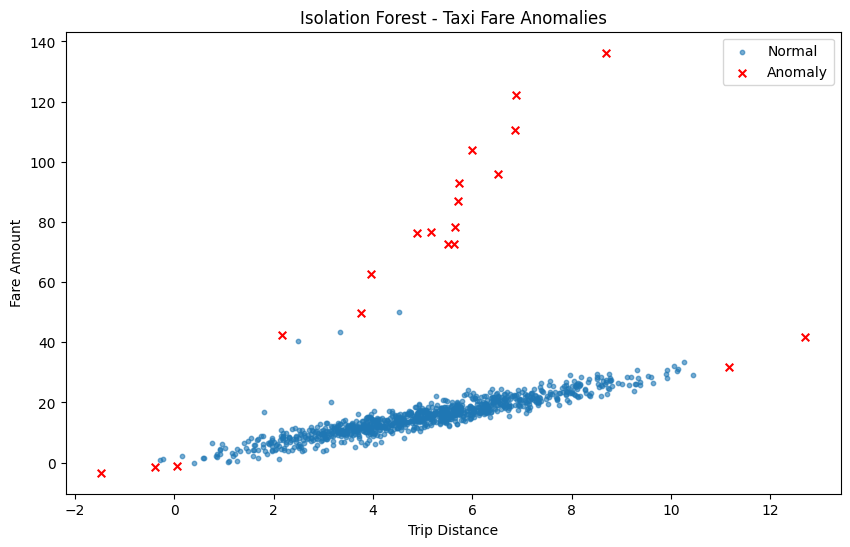

In [6]:
#7. Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Synthetic taxi dataset (replace with pd.read_csv('nyc_taxi.csv') if available)
np.random.seed(42)
trip_distance = np.random.normal(5, 2, 1000)
fare_amount = trip_distance * 3 + np.random.normal(0, 2, 1000)
# Inject anomalies
fare_amount[::50] = fare_amount[::50] * 5

df = pd.DataFrame({
    'trip_distance': trip_distance,
    'fare_amount': fare_amount
})

# Prepare features
X = df[['fare_amount','trip_distance']].values
X_scaled = StandardScaler().fit_transform(X)

# Fit Isolation Forest
iso = IsolationForest(n_estimators=200, contamination=0.02, random_state=42)
df['anomaly_if'] = iso.fit_predict(X_scaled) == -1

# Plot anomalies
plt.figure(figsize=(10,6))
plt.scatter(df.loc[~df['anomaly_if'],'trip_distance'],
            df.loc[~df['anomaly_if'],'fare_amount'],
            s=10, label='Normal', alpha=0.6)
plt.scatter(df.loc[df['anomaly_if'],'trip_distance'],
            df.loc[df['anomaly_if'],'fare_amount'],
            s=30, label='Anomaly', marker='x', color='red')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Isolation Forest - Taxi Fare Anomalies')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


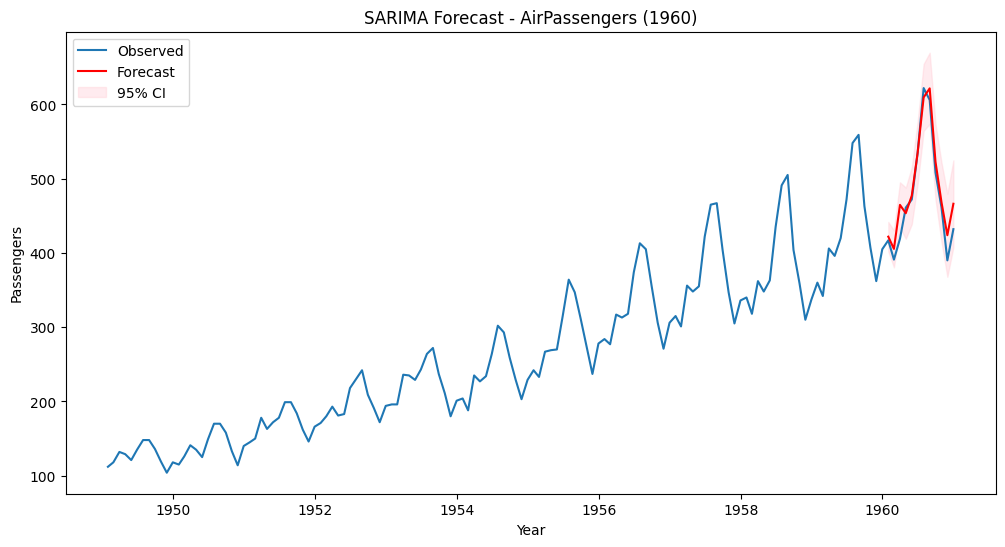

Forecasted passenger counts (1960):
1960-01-31    421.874565
1960-02-29    405.445229
1960-03-31    464.707606
1960-04-30    453.484650
1960-05-31    477.282510
1960-06-30    534.858432
1960-07-31    609.485734
1960-08-31    621.617773
1960-09-30    522.649044
1960-10-31    467.975115
1960-11-30    423.825792
1960-12-31    466.213595
Freq: ME, Name: predicted_mean, dtype: float64


In [7]:
# 8. Train SARIMA on AirPassengers and forecast 12 months
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train-test split
train = series[:'1959-12']
test = series['1960-01':]

# Fit SARIMA(1,1,1)(1,1,1,12)
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Forecast 12 months
forecast = results.get_forecast(steps=12)
pred_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot
plt.figure(figsize=(12,6))
plt.plot(series, label='Observed')
plt.plot(pred_mean, label='Forecast', color='red')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 color='pink', alpha=0.3, label='95% CI')
plt.title('SARIMA Forecast - AirPassengers (1960)')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()

print("Forecasted passenger counts (1960):")
print(pred_mean)

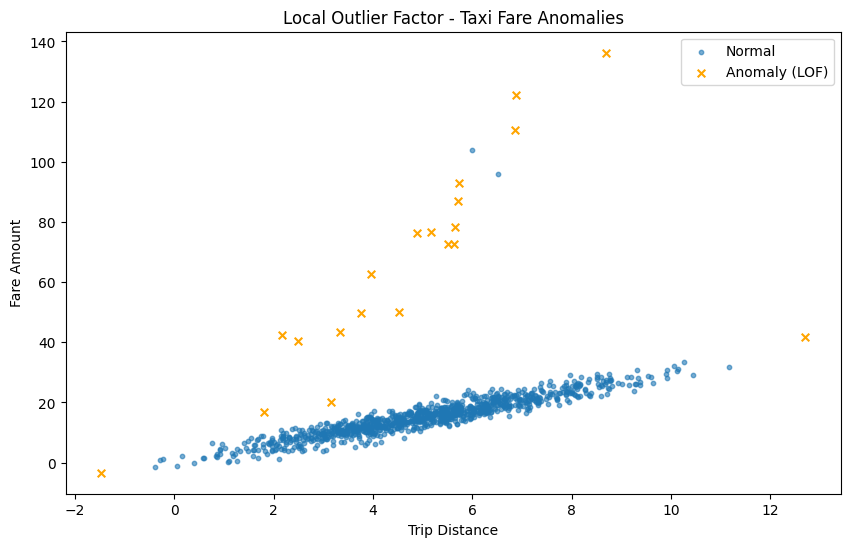

LOF detected anomalies:
     trip_distance  fare_amount  anomaly_if  anomaly_lof
50        5.648168    78.466892        True         True
100       2.169259    42.518979        True         True
150       5.500986    72.600862        True         True
200       5.715575    86.985866        True         True
209      12.705463    41.615542        True         True


In [8]:
#9. Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.
from sklearn.neighbors import LocalOutlierFactor

# LOF fit
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
df['anomaly_lof'] = lof.fit_predict(X_scaled) == -1

# Plot
plt.figure(figsize=(10,6))
plt.scatter(df.loc[~df['anomaly_lof'],'trip_distance'],
            df.loc[~df['anomaly_lof'],'fare_amount'],
            s=10, label='Normal', alpha=0.6)
plt.scatter(df.loc[df['anomaly_lof'],'trip_distance'],
            df.loc[df['anomaly_lof'],'fare_amount'],
            s=30, label='Anomaly (LOF)', marker='x', color='orange')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Local Outlier Factor - Taxi Fare Anomalies')
plt.legend()
plt.show()

print("LOF detected anomalies:")
print(df[df['anomaly_lof']].head())


10. You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.

 Explain your real-time data science workflow:

 ● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?
 ● Which time series model would you use for short-term forecasting (ARIMA /
   SARIMA / SARIMAX)?
 ● How would you validate and monitor the performance over time?
 ● How would this solution help business decisions or operations?                  

- ## Problem:
- Dataset: 15-min intervals with `timestamp`, `region`, `weather (temp, humidity, wind)`, and `energy_usage`.
- Goals:  
  1. Forecast short-term demand.  
  2. Detect anomalies (spikes/drops) in real-time.


  ### Workflow:

  #### 1. Data Ingestion & Preprocessing
   - Stream data via Kafka → Spark Streaming/Flink.
   - Create rolling features (last 1h avg, daily pattern, lag features).
   - Handle missing/sensor errors in real time.

  #### 2. Anomaly Detection
   - **Isolation Forest** for scalable anomaly detection on numeric features (energy usage + lag features).
   - **Local Outlier Factor (LOF)** for detecting local/contextual anomalies.
   - **Rule-based checks** (e.g., negative usage, max capacity).

  #### 3. Forecasting Model
  - Use **SARIMAX** for each region:
  - Seasonal (daily/weekly patterns).  
  - Exogenous variables (weather, holidays).  
  - For complex multi-region data: gradient boosting (XGBoost/LightGBM) or LSTM for short-term horizons.

  #### 4. Validation & Monitoring
   - Rolling-origin backtesting to simulate streaming.
   - Metrics: RMSE, MAPE for forecasts; Precision/Recall for anomalies.
   - Drift detection: monitor changes in error distribution & input features.
   - Retraining: schedule weekly or trigger if drift detected.

  #### 5. Business Impact
   - **Prevent blackouts**: early detection of abnormal spikes.  
   - **Optimize energy purchasing**: accurate forecasts reduce costs.  
   - **Load balancing**: anticipate peaks, schedule generation accordingly.  
   - **Fraud/Tampering detection**: anomalies may indicate meter tampering.  




In [10]:
# Q10b: Short demo - streaming energy usage anomaly detection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# --- 1) Generate synthetic 15-min data (30 days) ---
np.random.seed(42)
periods = 30 * 24 * 4  # 30 days, 24 hrs, 4 samples/hr
idx = pd.date_range("2025-08-01", periods=periods, freq="15min")

# Daily seasonality + noise
hours = idx.hour + idx.minute/60
usage = 100 + 20*np.sin((hours-18)/24*2*np.pi)*-1 + np.random.normal(0,3,len(idx))

df = pd.DataFrame({"timestamp": idx, "energy_usage": usage})
df.set_index("timestamp", inplace=True)

# Inject anomalies (spikes/drops)
df["energy_usage"].iloc[::300] *= 1.8   # spikes
df["energy_usage"].iloc[::500] *= 0.4   # drops


# --- 2) Isolation Forest on sliding window ---
model = IsolationForest(contamination=0.02, random_state=42)
window = 7*24*4  # 7 days
flags = []

for i in range(len(df)):
    if i < window:
        flags.append(False)
        continue
    train = df.iloc[i-window:i][["energy_usage"]]
    model.fit(train)
    pred = model.predict(df.iloc[[i]][["energy_usage"]])[0]
    flags.append(pred == -1)

df["anomaly"] = flags

# --- 3) Plot results ---
plt.figure(figsize=(14,5))
plt.plot(df.index, df["energy_usage"], label="Energy Usage")
plt.scatter(df.index[df["anomaly"]], df["energy_usage"][df["anomaly"]],
            color="red", marker="x", label="Anomaly")
plt.title("Streaming Energy Usage with Anomalies (Isolation Forest)")
plt.xlabel("Time")
plt.ylabel("Usage (MW)")
plt.legend()
plt.show()

/tmp/ipython-input-802169050.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["energy_usage"].iloc[::300] *= 1.8   # spikes
/tmp/ipython-input-802169050.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-802169050.py", line 35, in <cell line: 0>
    pred = model.predict(df.iloc[[i]][["energy_usage"]])[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_iforest.py", line 420, in predict
    decision_func = self.decision_function(X)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_iforest.py", line 474, in decision_function
    return self.score_samples(X) - self.offset_
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_iforest.py", line 528, in score_samples
    return self._score_samples(X)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/ensemb

TypeError: object of type 'NoneType' has no len()